#Real Estate of Dubai - Analysis and Prediction
##Valuation Dataset
Fields in this dataset are as below:

*   Row status
*   Property_Id

*   Property Type
*   Property Sub Type

*   Valuation date
*   Procedure and Actual area in sq ft

*   Valuation amount as actual_worth and total_value

###Importing libraries and dataset

In [567]:
#import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [568]:
#Import datasets from the csv files
vdf = pd.read_csv('./Valuation.csv')


In [569]:
#tdf = pd.read_csv('./Transactions.csv')

In [570]:
#head() gives us first few rows of the dataframe, this gives a peek into the content of the dataframe
vdf.head()

,procedure_id,procedure_name_ar,procedure_name_en,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_ar,property_type_en,property_sub_type_id,property_sub_type_ar,property_sub_type_en,area_id,area_name_ar,area_name_en,actual_area,property_total_value
0,24,تقييم عقار,Property Evaluation,2005,254,30-04-2005,9750000,COMPLETED,697,1,ارض,Land,62,تجارية,Commercial,239,البراحه,Al Baraha,697,9750000
1,24,تقييم عقار,Property Evaluation,2001,259,23-10-2001,0,COMPLETED,1159,1,ارض,Land,63,سكنية,Residential,318,جميرا الثالثه,Jumeirah Third,1159,nan
2,24,تقييم عقار,Property Evaluation,2009,261,16-03-2009,39883500,COMPLETED,2470,1,ارض,Land,62,تجارية,Commercial,368,البرشاء الاولى,Al Barsha First,2470,39883500
3,24,تقييم عقار,Property Evaluation,2004,268,18-04-2004,4000000,COMPLETED,4455,1,ارض,Land,11,مخازن او مستودعات,Warehouse,319,راس الخور الصناعيه الثانيه,Ras Al Khor Industrial Second,4455,4000000
4,24,تقييم عقار,Property Evaluation,2006,272,22-03-2006,3000000,COMPLETED,1394,1,ارض,Land,63,سكنية,Residential,369,البرشاء الثالثه,Al Barsha Third,1394,3000000


In [571]:
#tdf.head()

###Dropping columns and understanding metadata

In [572]:
#dropping fields which are either redundant or not required for our project
#the arabic values are translated into english values in a different column, so we are removing the arabic columns
vdf = vdf.drop(['procedure_id','procedure_name_ar','procedure_name_en','property_type_ar','property_sub_type_ar','area_name_ar'],axis=1)

In [573]:
vdf.head()

,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value
0,2005,254,30-04-2005,9750000,COMPLETED,697,1,Land,62,Commercial,239,Al Baraha,697,9750000
1,2001,259,23-10-2001,0,COMPLETED,1159,1,Land,63,Residential,318,Jumeirah Third,1159,nan
2,2009,261,16-03-2009,39883500,COMPLETED,2470,1,Land,62,Commercial,368,Al Barsha First,2470,39883500
3,2004,268,18-04-2004,4000000,COMPLETED,4455,1,Land,11,Warehouse,319,Ras Al Khor Industrial Second,4455,4000000
4,2006,272,22-03-2006,3000000,COMPLETED,1394,1,Land,63,Residential,369,Al Barsha Third,1394,3000000


In [574]:
#dropping fields which are either redundant or not required for our project
#tdf = tdf.drop(['procedure_id','procedure_name_ar','property_type_ar','area_name_ar','property_sub_type_ar','reg_type_ar'], axis=1)

In [575]:
#info() gives understanding of the metadata in the dataframe
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59389 entries, 0 to 59388
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   procedure_year        59389 non-null  int64  
 1   procedure_number      59389 non-null  int64  
 2   instance_date         59389 non-null  object 
 3   actual_worth          59326 non-null  float64
 4   row_status_code       59389 non-null  object 
 5   procedure_area        59373 non-null  float64
 6   property_type_id      59389 non-null  int64  
 7   property_type_en      59389 non-null  object 
 8   property_sub_type_id  55564 non-null  float64
 9   property_sub_type_en  55564 non-null  object 
 10  area_id               59387 non-null  float64
 11  area_name_en          59387 non-null  object 
 12  actual_area           59389 non-null  float64
 13  property_total_value  58672 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 6.3+ MB


In [576]:
#describe() helps us understand statistical information like mean etc
vdf.describe()

,procedure_year,procedure_number,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value
count,59389,59389,59326,59373,59389,55564,59387,59389,58672
mean,2015,2632,35506326,14925,2,57,359,13280,35861295
std,4,2111,225592833,385436,1,15,79,391687,226468603
min,2000,1,-1,0,1,1,230,0,0
25%,2013,820,1821507,208,1,60,306,209,1927112
50%,2016,2117,5874206,1022,1,62,350,1022,6000000
75%,2018,4045,21000000,2787,2,63,410,2774,21607652
max,2021,8334,16384019200,50706244,3,113,531,52472793,16384019200


####Numeric values in 0 or negative values are basically junk data entered, we will look into removing them or replacing them.
*Procedure year is from 2000 to 2021
*Min area is 0
*Min worth and value is -1

###Row_status_code

In [577]:
#Removing the rows in "Cancelled" or "Entered" development status as it is not relevant to our study
actualvDf = vdf[vdf.row_status_code != "CANCELLED"]
actualvDf = vdf[vdf.row_status_code != "ENTERED"]
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value
0,2005,254,30-04-2005,9750000,COMPLETED,697,1,Land,62,Commercial,239,Al Baraha,697,9750000
1,2001,259,23-10-2001,0,COMPLETED,1159,1,Land,63,Residential,318,Jumeirah Third,1159,nan
2,2009,261,16-03-2009,39883500,COMPLETED,2470,1,Land,62,Commercial,368,Al Barsha First,2470,39883500
3,2004,268,18-04-2004,4000000,COMPLETED,4455,1,Land,11,Warehouse,319,Ras Al Khor Industrial Second,4455,4000000
4,2006,272,22-03-2006,3000000,COMPLETED,1394,1,Land,63,Residential,369,Al Barsha Third,1394,3000000


In [578]:
#row_status_code encoding the stautses to numeric values
statusgroups = {1: "COMPLETED",
                  2: "ENTERED",
                  3: "None"
                   }
def statusgroup(row_status_code):
    if row_status_code == 'COMPLETED':
       return "1"
    elif row_status_code == 'ENTERED':
       return "2"
    else:
      return "3"

In [579]:
actualvDf['row_status']= actualvDf['row_status_code'].apply(statusgroup)
actualvDf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
0,2005,254,30-04-2005,9750000,COMPLETED,697,1,Land,62,Commercial,239,Al Baraha,697,9750000,1
1,2001,259,23-10-2001,0,COMPLETED,1159,1,Land,63,Residential,318,Jumeirah Third,1159,nan,1
2,2009,261,16-03-2009,39883500,COMPLETED,2470,1,Land,62,Commercial,368,Al Barsha First,2470,39883500,1
3,2004,268,18-04-2004,4000000,COMPLETED,4455,1,Land,11,Warehouse,319,Ras Al Khor Industrial Second,4455,4000000,1
4,2006,272,22-03-2006,3000000,COMPLETED,1394,1,Land,63,Residential,369,Al Barsha Third,1394,3000000,1


In [580]:
#Drop row_status_code column
actualvDf=actualvDf.drop(['row_status_code'],axis=1)
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
0,2005,254,30-04-2005,9750000,697,1,Land,62,Commercial,239,Al Baraha,697,9750000,1
1,2001,259,23-10-2001,0,1159,1,Land,63,Residential,318,Jumeirah Third,1159,nan,1
2,2009,261,16-03-2009,39883500,2470,1,Land,62,Commercial,368,Al Barsha First,2470,39883500,1
3,2004,268,18-04-2004,4000000,4455,1,Land,11,Warehouse,319,Ras Al Khor Industrial Second,4455,4000000,1
4,2006,272,22-03-2006,3000000,1394,1,Land,63,Residential,369,Al Barsha Third,1394,3000000,1


###Actual_worth and Property_total_value

In [581]:
actualvDf.shape

(59200, 14)

In [582]:
#correlation 0.99 is very strongly correlated so we can drop the one of the column:
actualvDf.isnull().sum()

procedure_year             0
procedure_number           0
instance_date              0
actual_worth              14
procedure_area            16
property_type_id           0
property_type_en           0
property_sub_type_id    3813
property_sub_type_en    3813
area_id                    2
area_name_en               2
actual_area                0
property_total_value     668
row_status                 0
dtype: int64

In [583]:
#Remove null values from actual_worth
actualvDf = actualvDf[actualvDf.actual_worth != 0]
actualvDf = actualvDf[actualvDf.actual_worth != "null"]
actualvDf.shape

(58408, 14)

In [584]:
actualvDf['value_comp'] = np.where(actualvDf['actual_worth'] == actualvDf['property_total_value'],1,0)
actualvDf.loc[actualvDf['value_comp'] == 0]

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status,value_comp
298,2009,1215,15-02-2010,-1,334,1,Land,63,Residential,300,Al Rashidiya,334,1100000,1,0
301,2009,1167,16-02-2010,-1,11524,1,Land,62,Commercial,371,Al Safouh Second,11524,23320272,1,0
303,2009,1163,21-02-2010,-1,10654,1,Land,62,Commercial,371,Al Safouh Second,10654,33028416,1,0
305,2009,1134,23-02-2010,-1,272,1,Land,62,Commercial,238,Al Dhagaya,272,3950100,1,0
341,2010,574,14-04-2010,2150000,1375,1,Land,63,Residential,311,Muhaisanah Third,1375,1998000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53351,2019,892,05-03-2019,nan,1800,1,Land,62,Commercial,264,Nad Al Hamar,1800,nan,1,0
53352,2019,893,05-03-2019,nan,3000,1,Land,62,Commercial,264,Nad Al Hamar,3000,nan,1,0
53713,2020,538,16-02-2020,24923423,26016,1,Land,64,Agricultural,401,Wadi Al Amardi,26016,25000000,1,0
55384,2020,2401,13-09-2020,nan,43,3,Unit,60,Flat,467,Wadi Al Safa 5,43,nan,1,0


###Property_type

In [585]:
#property_type_en and property_type_id are categorical to same values as below:
#Land: 1
#Building: 2
#Unit: 3
#Dropping property_type_en as it is encoded in property_type_id
actualvDf=actualvDf.drop(['property_type_en'],axis=1)
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status,value_comp
0,2005,254,30-04-2005,9750000,697,1,62,Commercial,239,Al Baraha,697,9750000,1,1
2,2009,261,16-03-2009,39883500,2470,1,62,Commercial,368,Al Barsha First,2470,39883500,1,1
3,2004,268,18-04-2004,4000000,4455,1,11,Warehouse,319,Ras Al Khor Industrial Second,4455,4000000,1,1
4,2006,272,22-03-2006,3000000,1394,1,63,Residential,369,Al Barsha Third,1394,3000000,1,1
5,2005,275,08-05-2005,26208000,4870,1,65,Industrial,378,Al Garhoud,4870,26208000,1,1


In [586]:
actualvDf.corr()

,procedure_year,procedure_number,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,value_comp
procedure_year,1,0,0,0,0,-0,0,0,0,0
procedure_number,0,1,-0,-0,0,-0,0,0,-0,0
actual_worth,0,-0,1,0,-0,0,0,0,1,-0
procedure_area,0,-0,0,1,-0,-0,0,1,0,-0
property_type_id,0,0,-0,-0,1,-0,0,-0,-0,0
property_sub_type_id,-0,-0,0,-0,-0,1,-0,-0,0,-0
area_id,0,0,0,0,0,-0,1,0,0,0
actual_area,0,0,0,1,-0,-0,0,1,0,-0
property_total_value,0,-0,1,0,-0,0,0,0,1,-0
value_comp,0,0,-0,-0,0,-0,0,-0,-0,1


###Property_sub_type

In [587]:
#Dropping the property sub_types irrelevant to the study, these are general use diverse subset
drop_lst = ["Bus station & drivers residenc", 
"Car Services", 
"CHURCH", 
"Clinic", 
"Consulate", 
"Commercial", 
"Cooling Station", 
"Electricity Station", 
"Embassy", 
"Exhbition Center", 
"Funeral Gathering", 
"General Authority", 
"General Services", 
"General Use", 
"Government Housing", 
"Ground Level Parcking", 
"Gymnasium", 
"Health Club", 
"Hospital", 
"Hotel", 
"Labor Camp", 
"Mosque", 
"Multi Store Parcking", 
"Parking", 
"Organizations", 
"Petrol Station", 
"Railway Station", 
"Plants shop", 
"School", 
"Rest Area", 
"Sports Club", 
"Shopping Mall", 
"Sized Partition", 
"Warehouse", 
"Workshop"]
#actualvDf = actualvDf[actualvDf.property_sub_type_en != drop_lst, inplace=True]
#actualvDf = vdf[vdf.row_status_code != "ENTERED"]
#actualvDf.head()

In [588]:
actualvDf.property_sub_type_en.replace(to_replace=drop_lst, value='Other', inplace=True)
actualvDf = actualvDf[actualvDf.property_sub_type_en != 'Other']
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status,value_comp
4,2006,272,22-03-2006,3000000,1394,1,63,Residential,369,Al Barsha Third,1394,3000000,1,1
5,2005,275,08-05-2005,26208000,4870,1,65,Industrial,378,Al Garhoud,4870,26208000,1,1
8,2005,285,09-05-2005,2170000,1394,1,63,Residential,393,Al Barsha Second,1394,2170000,1,1
9,2006,285,28-03-2006,4500000,1394,1,63,Residential,314,Al Saffa Second,1394,4500000,1,1
13,2006,293,02-04-2006,5000000,311,1,63,Residential,233,Hor Al Anz,311,5000000,1,1


In [589]:
#We are categorizing various property sub types under broader categories for analysis:
#  Commercial for office, industrial, shop etc
#  Residential for flat, building etc
#Defining a dictionary with the property sub type categories
propertygroups = {1: "Commercial",
                  2: "Residential",
                  3: "None"
                   }
#defining a function to categorise the values in DF into the sub type categories
def propgroup(property_sub):
    if property_sub is 42:
       return "1"
    elif property_sub == 65: #industrial
       return "1"
    elif property_sub == 23: #shop
       return "1"
    elif property_sub == 17: #shopping mall
       return "1"
    elif property_sub == 4: #villa
       return "2"
    elif property_sub == 3: #unit
       return "2"
    elif property_sub == 63: #residential 
       return "2"
    elif property_sub == 38: #residential flat 
       return "2"
    elif property_sub == 60: #flat
       return "2"
    elif property_sub == 101: #hotel apartment
       return "2"
    else:
       return "3"
  

In [590]:
#applying the propgroup function the dataframe for the property_sub_type_id column, to categorise them in aommercial or Residential
actualvDf['property_category']= actualvDf['property_sub_type_id'].apply(propgroup)

In [591]:
actualvDf.tail(15)

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status,value_comp,property_category
59357,2021,2400,17-06-2021,255894,32,3,60,Flat,484,Nadd Hessa,32,255894,1,1,2
59359,2021,2402,20-06-2021,3654177,263,3,42,Office,526,Business Bay,263,3654177,1,1,3
59363,2021,2406,20-06-2021,663282,87,3,60,Flat,507,Al Yelayiss 2,87,663282,1,1,2
59364,2021,2407,20-06-2021,566899,59,3,60,Flat,442,Al Barsha South Fifth,59,566899,1,1,2
59369,2021,2163,03-06-2021,16762406,1557,1,63,Residential,412,Al Merkadh,1557,16762406,1,1,2
59373,2021,2167,03-06-2021,1607872,231,3,42,Office,350,Al Thanyah Fifth,231,1607872,1,1,3
59374,2021,2168,03-06-2021,7500000,1263,1,63,Residential,303,Um Suqaim First,1263,7500000,1,1,2
59376,2021,2170,03-06-2021,3500000,1394,1,63,Residential,359,Al Twar Third,1394,3500000,1,1,2
59380,2021,2176,03-06-2021,515459,77,3,60,Flat,484,Nadd Hessa,77,515459,1,1,2
59381,2021,2177,03-06-2021,1300959986,2197514,1,63,Residential,451,Al Hebiah Fifth,2197514,1300959986,1,1,2


In [592]:
#Dropping property_sub_type_en as we have Property_sub_type_id and property_category as well
actualvDf=actualvDf.drop(['property_sub_type_en'],axis=1)

In [593]:
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,area_name_en,actual_area,property_total_value,row_status,value_comp,property_category
4,2006,272,22-03-2006,3000000,1394,1,63,369,Al Barsha Third,1394,3000000,1,1,2
5,2005,275,08-05-2005,26208000,4870,1,65,378,Al Garhoud,4870,26208000,1,1,1
8,2005,285,09-05-2005,2170000,1394,1,63,393,Al Barsha Second,1394,2170000,1,1,2
9,2006,285,28-03-2006,4500000,1394,1,63,314,Al Saffa Second,1394,4500000,1,1,2
13,2006,293,02-04-2006,5000000,311,1,63,233,Hor Al Anz,311,5000000,1,1,2


In [594]:
actualvDf.shape

(39736, 14)

###Area_id and Area_name_en

In [595]:
#Copying over the original dataframe to a new one, and keeping only area related fields
areaDf=actualvDf
areaDf = areaDf.drop(['procedure_year','procedure_number','instance_date','actual_worth','property_type_id','procedure_area','property_sub_type_id','actual_area','property_total_value','row_status','value_comp','property_category'],axis=1)
areaDf.head()

,area_id,area_name_en
4,369,Al Barsha Third
5,378,Al Garhoud
8,393,Al Barsha Second
9,314,Al Saffa Second
13,233,Hor Al Anz


In [596]:
areaDf.shape

(39736, 2)

In [597]:
#Dropping duplicates
areaDf = areaDf.drop_duplicates()
areaDf.shape

(200, 2)

In [598]:
#Sorting areas as per the area_id
areaDf = areaDf.sort_values(by=['area_id'])

In [599]:
areaDf.head(15)

,area_id,area_name_en
25,230,Abu Hail
112,231,Al Mamzer
28,232,Mirdif
13,233,Hor Al Anz
78,234,Hor Al Anz East
1979,235,Eyal Nasser
13286,237,Al Sabkha
949,238,Al Dhagaya
368,239,Al Baraha
774,240,Port Saeed


In [600]:
#Dropping area_name_en from original DF as we have stored the area_id and corresponding names in a new DF areaDf, for future reference
actualvDf=actualvDf.drop(['area_name_en'],axis=1)


In [601]:
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category
4,2006,272,22-03-2006,3000000,1394,1,63,369,1394,3000000,1,1,2
5,2005,275,08-05-2005,26208000,4870,1,65,378,4870,26208000,1,1,1
8,2005,285,09-05-2005,2170000,1394,1,63,393,1394,2170000,1,1,2
9,2006,285,28-03-2006,4500000,1394,1,63,314,1394,4500000,1,1,2
13,2006,293,02-04-2006,5000000,311,1,63,233,311,5000000,1,1,2


###Procedure_area and Actual_area

In [602]:
#Comparison of columns procedure_area and actual_area 
actualvDf['procedure_area'].equals(actualvDf['actual_area'])

False

In [603]:
actualvDf['area_comp'] = np.where(actualvDf['procedure_area'] == actualvDf['actual_area'],1,0)
#df['Diff'] = np.where( df['Score A'] == df['Score B'] , '1', '0')
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category,area_comp
4,2006,272,22-03-2006,3000000,1394,1,63,369,1394,3000000,1,1,2,1
5,2005,275,08-05-2005,26208000,4870,1,65,378,4870,26208000,1,1,1,1
8,2005,285,09-05-2005,2170000,1394,1,63,393,1394,2170000,1,1,2,1
9,2006,285,28-03-2006,4500000,1394,1,63,314,1394,4500000,1,1,2,1
13,2006,293,02-04-2006,5000000,311,1,63,233,311,5000000,1,1,2,1


In [604]:
actualvDf.loc[actualvDf['area_comp'] == 0]
#df.loc[df['column_name'] == some_value]

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category,area_comp
27,2002,326,21-07-2002,850000,1858,1,63,312,1839,850000,1,1,2,0
31,2008,342,06-03-2008,2505000,279,1,63,317,233,2505000,1,1,2,0
37,2007,354,01-05-2007,18172800,2109,1,63,247,2110,18172800,1,1,2,0
47,2009,13,07-01-2009,10000000,4181,1,63,401,2090,10000000,1,1,2,0
100,2009,92,29-01-2009,48000000,6138,1,63,317,6129,48000000,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58390,2021,862,25-02-2021,6354662,3690,1,63,312,922,6354662,1,1,2,0
58393,2021,866,25-02-2021,14357858,9299,1,65,308,7410,14357858,1,1,1,0
58618,2021,284,19-01-2021,1184178618,2200278,1,63,451,2197514,1184178618,1,1,2,0
58646,2021,317,21-01-2021,11919985,2769,1,63,370,1559,11919985,1,1,2,0


In [605]:
actualvDf.shape

(39736, 14)

In [606]:
#actualvDf=actualvDf.drop(['procedure_area','area_comp'],axis=1)
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category,area_comp
4,2006,272,22-03-2006,3000000,1394,1,63,369,1394,3000000,1,1,2,1
5,2005,275,08-05-2005,26208000,4870,1,65,378,4870,26208000,1,1,1,1
8,2005,285,09-05-2005,2170000,1394,1,63,393,1394,2170000,1,1,2,1
9,2006,285,28-03-2006,4500000,1394,1,63,314,1394,4500000,1,1,2,1
13,2006,293,02-04-2006,5000000,311,1,63,233,311,5000000,1,1,2,1


###Instance_date and Procedure_year

In [607]:
#Format instance Date and deduce year and month of valuation

actualvDf['instance_date'] = pd.to_datetime(actualvDf.instance_date)

actualvDf['Year'] = actualvDf['instance_date'].dt.year
actualvDf['Month'] = actualvDf['instance_date'].dt.month


In [608]:
#Compare Procedure_year and year from instance date if they are always same
actualvDf['year_comp'] = np.where(actualvDf['procedure_year'] == actualvDf['Year'],1,0)
actualvDf.loc[actualvDf['year_comp'] == 0]

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category,area_comp,Year,Month,year_comp
298,2009,1215,2010-02-15,-1,334,1,63,300,334,1100000,1,0,2,1,2010,2,0
525,2010,1104,2011-10-20,11014500,4599,1,65,373,4599,11014500,1,1,1,1,2011,10,0
533,2010,1128,2011-10-20,960000,557,1,3,318,557,960000,1,1,2,1,2011,10,0
534,2010,1129,2011-10-20,30000,37,1,nan,264,37,30000,1,1,3,1,2011,10,0
535,2010,1130,2011-10-20,28000,37,1,nan,401,37,28000,1,1,3,1,2011,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10362,2011,1801,2012-01-17,3500000,929,1,63,318,929,3500000,1,1,2,1,2012,1,0
10428,2011,1775,2012-05-01,10500000,2134,1,63,375,2134,10500000,1,1,2,1,2012,5,0
10429,2011,1780,2012-05-01,1000000,109,3,60,330,109,1000000,1,1,2,1,2012,5,0
10500,2011,1755,2012-05-01,4650000,1394,1,63,314,1394,4650000,1,1,2,1,2012,5,0


In [609]:
#Dropping columns
#actualvDf=actualvDf.drop(['procedure_year','instance_date','year_comp'],axis=1)
actualvDf.tail()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value,row_status,value_comp,property_category,area_comp,Year,Month,year_comp
59382,2021,2178,2021-03-06,956842647,1532650,1,63,451,1532650,956842647,1,1,2,1,2021,3,1
59383,2021,2181,2021-06-06,5991994,795,1,63,375,795,5991994,1,1,2,1,2021,6,1
59384,2021,2182,2021-06-06,2005800,929,1,nan,497,929,2005800,3,1,3,1,2021,6,1
59385,2021,2183,2021-06-06,2139200,225,2,4,445,225,2139200,1,1,2,1,2021,6,1
59387,2021,2185,2021-06-06,727166,69,3,60,526,69,727166,1,1,2,1,2021,6,1


###Formatting numeric values to 0 float integers

In [610]:
#

#pd.options.display.float_format = '{:.0f}'.format

###Reducing dimensions

In [611]:
corr_matrix = actualvDf[actualvDf.columns[1:]].corr()['actual_area'][:-1]

In [612]:
corr_matrix

procedure_number       -0
actual_worth            1
procedure_area          0
property_type_id       -0
property_sub_type_id    0
area_id                 0
actual_area             1
property_total_value    1
value_comp             -0
area_comp              -0
Year                    0
Month                  -0
Name: actual_area, dtype: float64

In [613]:
#0.99 correlation is very close so dropping a column
actualvDf = actualvDf.drop(['actual_worth'],axis=1)

In [614]:

actualvDf = actualvDf.drop(['actual_area'],axis=1)

In [615]:
actualvDf = actualvDf.drop(['procedure_year'],axis=1)

In [616]:
actualvDf = actualvDf.drop(['year_comp'],axis=1)

In [617]:
actualvDf = actualvDf.drop(['value_comp'],axis=1)

In [618]:
actualvDf = actualvDf.drop(['area_comp'],axis=1)

In [619]:
actualvDf = actualvDf.drop(['instance_date'],axis=1)

In [620]:
df = actualvDf
actualvDf = actualvDf.drop(['procedure_number'],axis=1)

In [621]:
df.head()

,procedure_number,procedure_area,property_type_id,property_sub_type_id,area_id,property_total_value,row_status,property_category,Year,Month
4,272,1394,1,63,369,3000000,1,2,2006,3
5,275,4870,1,65,378,26208000,1,1,2005,8
8,285,1394,1,63,393,2170000,1,2,2005,9
9,285,1394,1,63,314,4500000,1,2,2006,3
13,293,311,1,63,233,5000000,1,2,2006,2


###Dropping null values

In [622]:
actualvDf.shape

(39736, 9)

In [623]:
actualvDf.isnull().sum()

procedure_area             6
property_type_id           0
property_sub_type_id    3783
area_id                    2
property_total_value       5
row_status                 0
property_category          0
Year                       0
Month                      0
dtype: int64

In [624]:
actualvDf = actualvDf.dropna(axis=0)

In [625]:
actualvDf.shape

(35942, 9)

In [626]:
actualvDf.head()

,procedure_area,property_type_id,property_sub_type_id,area_id,property_total_value,row_status,property_category,Year,Month
4,1394,1,63,369,3000000,1,2,2006,3
5,4870,1,65,378,26208000,1,1,2005,8
8,1394,1,63,393,2170000,1,2,2005,9
9,1394,1,63,314,4500000,1,2,2006,3
13,311,1,63,233,5000000,1,2,2006,2


In [627]:
# Count missing values in the dataframe
actualvDf.isnull().sum()

procedure_area          0
property_type_id        0
property_sub_type_id    0
area_id                 0
property_total_value    0
row_status              0
property_category       0
Year                    0
Month                   0
dtype: int64

##EDA

In [628]:
actualvDf.head()

,procedure_area,property_type_id,property_sub_type_id,area_id,property_total_value,row_status,property_category,Year,Month
4,1394,1,63,369,3000000,1,2,2006,3
5,4870,1,65,378,26208000,1,1,2005,8
8,1394,1,63,393,2170000,1,2,2005,9
9,1394,1,63,314,4500000,1,2,2006,3
13,311,1,63,233,5000000,1,2,2006,2


In [629]:
actualvDf.Year.value_counts()

2018    5157
2017    5085
2016    4253
2015    4178
2014    3487
2019    2344
2013    2140
2020    1838
2012    1447
2021    1322
2010     764
2011     751
2008     589
2009     507
2006     499
2005     403
2007     395
2004     376
2003     288
2002     118
2000       1
Name: Year, dtype: int64

In [630]:
actualvDf.shape

(35942, 9)

#####Looking at the yearly data we can remove the rows corresponding to the years as 2000 to 2011 (the clean data available for these years in not propotionate)

In [631]:
year_lst = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
actualvDf.Year.replace(to_replace=year_lst, value=0000, inplace=True)
actualvDf = actualvDf[actualvDf.Year != 0000]
actualvDf.shape

(31251, 9)

In [632]:
#range of procedure_area
actualvDf.describe()
#df1 = df.iloc[:,0:2]

,procedure_area,property_type_id,property_sub_type_id,area_id,property_total_value,Year,Month
count,31251,31251,31251,31251,31251,31251,31251
mean,10362,2,56,381,18939128,2016,7
std,308206,1,15,79,102296875,2,4
min,0,1,1,230,160,2012,1
25%,112,1,60,330,1214172,2015,3
50%,311,1,60,364,2878159,2017,6
75%,1849,3,63,444,9660000,2018,10
max,50706244,3,112,531,9214432998,2021,12


In [633]:
df = actualvDf[actualvDf.procedure_area <= 10]
df.tail(15)

,procedure_area,property_type_id,property_sub_type_id,area_id,property_total_value,row_status,property_category,Year,Month
57696,0,1,38,266,27000000,1,2,2021,5


In [634]:
#Drop rows with procedure_area and actual_area lessa than 10
actualvDf = actualvDf[actualvDf.procedure_area >= 10]
actualvDf.shape

(31250, 9)

In [635]:
#count of property_type_id
actualvDf.property_type_id.value_counts()

1    15692
3    14551
2     1007
Name: property_type_id, dtype: int64

In [636]:
fig = px.pie(actualvDf, values='property_category',names='property_type_id', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Text(0.5, 1.0, 'Property type with categories')

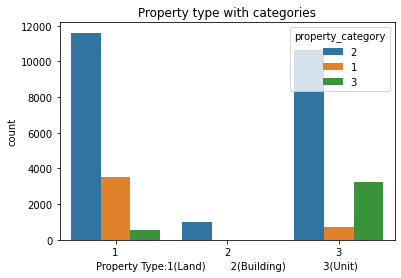

In [637]:
plt.figure()
fig = sns.countplot(x="property_type_id",hue="property_category",data=actualvDf)
plt.xlabel("Property Type:1(Land)        2(Building)            3(Unit)")
plt.title('Property type with categories')

In [638]:
#count of procedure_category
actualvDf.property_category.value_counts()

2    23217
1     4231
3     3802
Name: property_category, dtype: int64

Text(0.5, 1.0, 'Property categories')

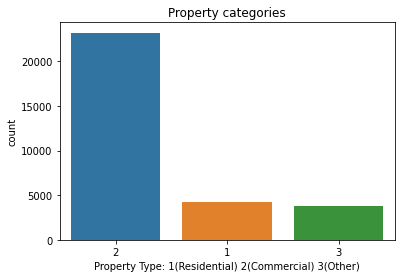

In [639]:
plt.figure()
fig = sns.countplot(x="property_category",data=actualvDf)
plt.xlabel("Property Type: 1(Residential) 2(Commercial) 3(Other)")
plt.title('Property categories')

In [640]:
#count of area_id
actualvDf.area_id.value_counts()

330    3186
350    2165
526    2127
390    1437
343     821
       ... 
480       1
514       1
508       1
531       1
476       1
Name: area_id, Length: 184, dtype: int64

In [641]:
#count of row_status: entered or completed
actualvDf.row_status.value_counts()

1    31196
3       54
Name: row_status, dtype: int64

In [642]:
# Export new file from updated data frame
actualvDf.to_csv('./valuation_cleaned.csv', index=False)

One-hot encoding for categories and types as we might need to scale in future for model

In [643]:
# Export new file from updated data frame
#scaledvDf.to_csv('./valuation_scaled.csv', index=False)